# Problem Statement:

 Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.
https://archive.ics.uci.edu/ml/datasets/Census+Income

## Attribute Information:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K


## Solution : 
    1. Handling null values
    2. EDA 
    3. Preprocessing
    4. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Reading the file 
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','class']
df_persons = pd.read_csv(r'Dataset\adult.data',header=None,names=col_names)

In [3]:
df_persons.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_persons.shape

(32561, 15)

In [5]:
col_unique_values = {}
for i in df_persons.columns:
    col_unique_values[i] = df_persons[i].unique()

In [6]:
col_unique_values

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
        46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
        26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
        83, 84, 85, 86, 87], dtype=int64),
 'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 'fnlwgt': array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64),
 'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 'education-num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
       dtype=int64),
 'm

### Explanation :
1. age, fnlwgt,capital-gain, capital-loss, education-num are quantitative variables which are discrete in nature. 
2. workclass, education,marital-status,occupation,relationship,race,sex,native-country,class are qualitative variables
3. the datatypes of the quantititive variables is of integers. 

In [7]:
#To get the basic information of the variables in the dataset
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df_persons.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

## Explanation : 
There are no null values exists in the dataset.

In [9]:
col_unique_values

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
        46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
        26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
        83, 84, 85, 86, 87], dtype=int64),
 'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 'fnlwgt': array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64),
 'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 'education-num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
       dtype=int64),
 'm

In [10]:
df_persons[df_persons['workclass'] == ' ?']= np.NaN

In [11]:
df_persons[df_persons.isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_persons.shape

(32561, 15)

In [13]:
#Explanation : The dataset has 32561 rows and 15 columns

In [14]:
df_persons.isna().sum()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1836
class             1836
dtype: int64

In [15]:
df_persons.dropna(inplace=True)

In [16]:
df_persons.shape

(30725, 15)

In [17]:
#Explanation : The dataset has 30725 rows and 15 columns

## EDA :

## Univariate Analysis

Text(0.5, 1.0, 'education num')

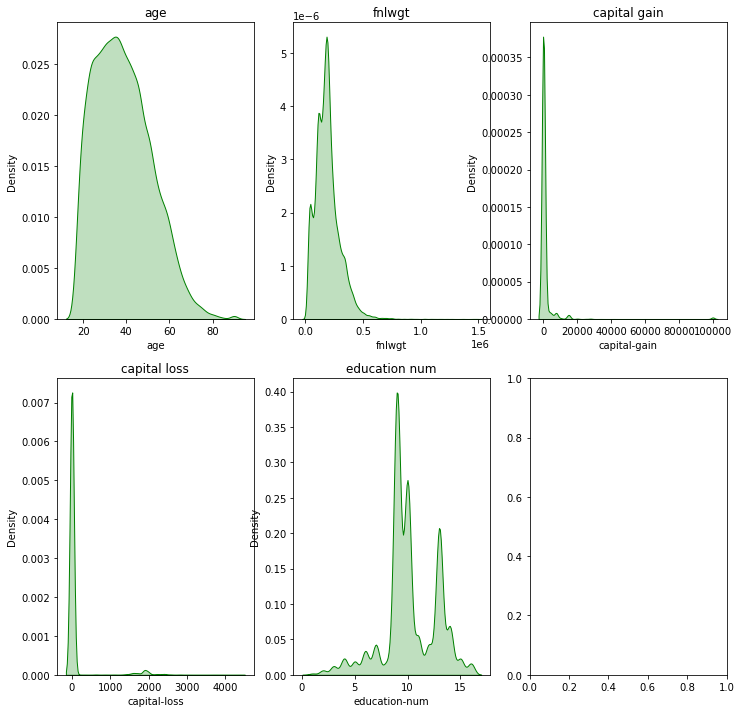

In [18]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,12))
i = ['age', 'fnlwgt','capital-gain', 'capital-loss', 'education-num']
sns.kdeplot(df_persons['age'],ax=ax[0,0],color='green',fill=True)
ax[0,0].set_title('age')

sns.kdeplot(df_persons['fnlwgt'],ax=ax[0,1],color='green',fill=True)
ax[0,1].set_title('fnlwgt')
sns.kdeplot(df_persons['capital-gain'],ax=ax[0,2],color='green',fill=True)
ax[0,2].set_title('capital gain')
sns.kdeplot(df_persons['capital-loss'],ax=ax[1,0],color='green',fill=True)
ax[1,0].set_title('capital loss')
sns.kdeplot(df_persons['education-num'],ax=ax[1,1],color='green',fill=True)
ax[1,1].set_title('education num')
    

Exaplanation : 
1. The data is right skewed for age, fnlwgt, capital-gain and capital-loss
2. The data is left skewed for education-num 

## Multi variate Analysis

In [19]:
df_persons.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.043884,0.080420,0.060463,0.102192
fnlwgt,-0.076628,1.000000,-0.043515,-0.000200,-0.010026,-0.022761
education-num,0.043884,-0.043515,1.000000,0.124257,0.079357,0.151367
capital-gain,0.080420,-0.000200,0.124257,1.000000,-0.032325,0.079560
capital-loss,0.060463,-0.010026,0.079357,-0.032325,1.000000,0.053998
hours-per-week,0.102192,-0.022761,0.151367,0.079560,0.053998,1.000000


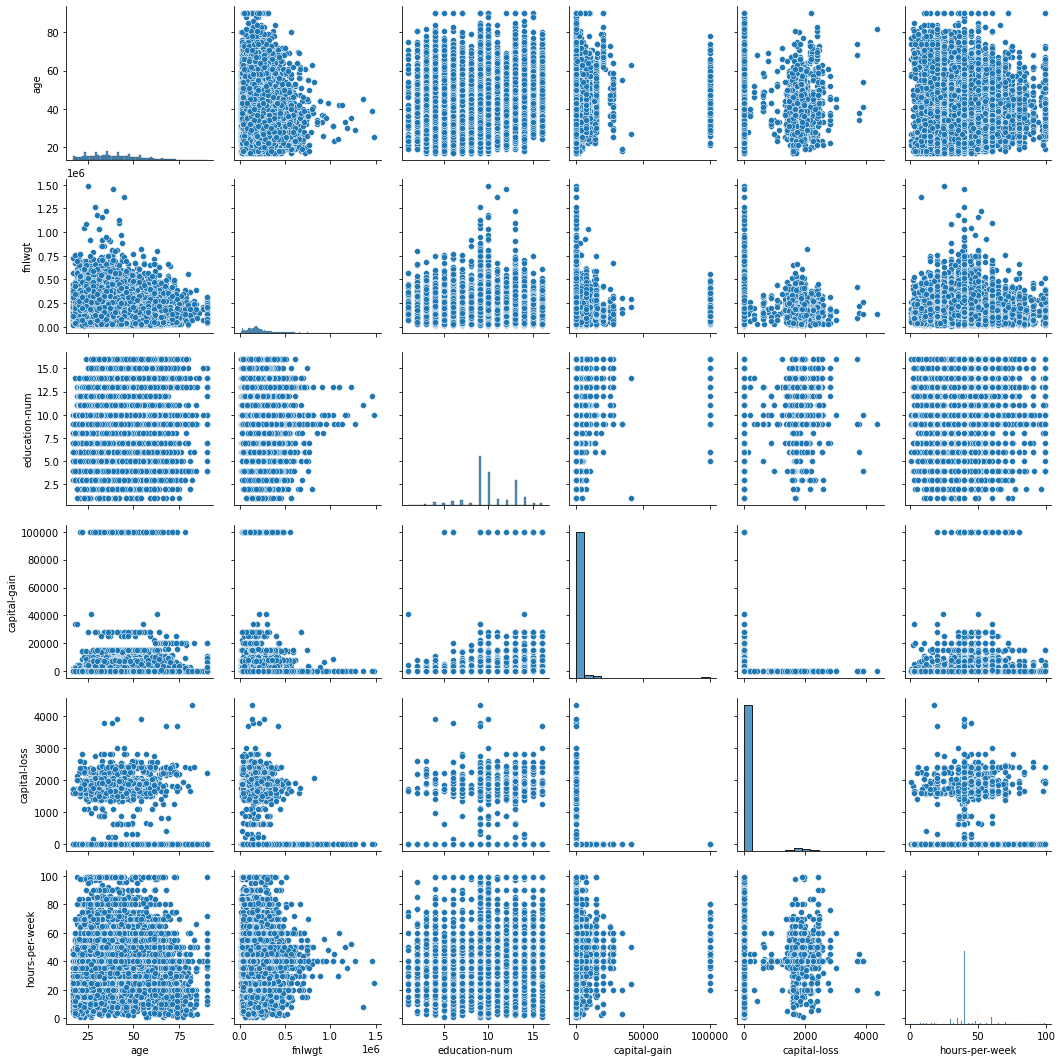

In [20]:
sns.pairplot(df_persons)

<AxesSubplot:>

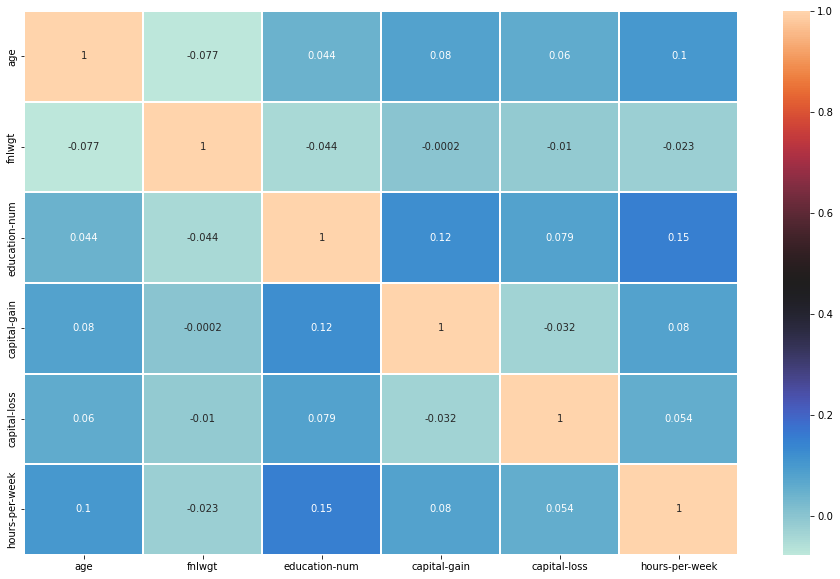

In [21]:
plt.figure(figsize=(16,10))

sns.heatmap(df_persons.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix

### Explanation : 
1. The variables Hours-per-week and education-num are positively correlated. 
2. The variables age and fnalwgt are negatively correlated.

<AxesSubplot:xlabel='age', ylabel='Density'>

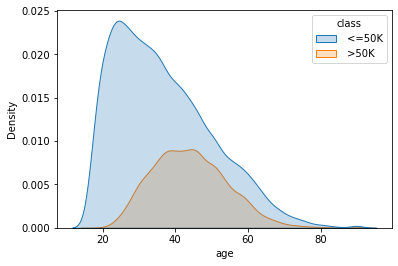

In [22]:
sns.kdeplot(df_persons['age'],color='green',fill=True,hue=df_persons['class'])

In [23]:
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30725 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          30725 non-null  float64
 3   education       30725 non-null  object 
 4   education-num   30725 non-null  float64
 5   marital-status  30725 non-null  object 
 6   occupation      30725 non-null  object 
 7   relationship    30725 non-null  object 
 8   race            30725 non-null  object 
 9   sex             30725 non-null  object 
 10  capital-gain    30725 non-null  float64
 11  capital-loss    30725 non-null  float64
 12  hours-per-week  30725 non-null  float64
 13  native-country  30725 non-null  object 
 14  class           30725 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.8+ MB


In [24]:
df_persons.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

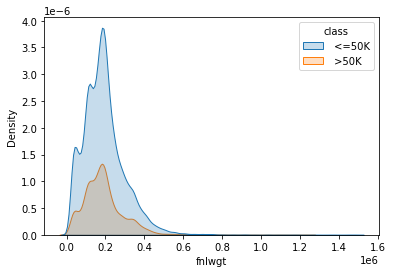

In [25]:
sns.kdeplot(df_persons['fnlwgt'],color='green',fill=True,hue=df_persons['class'])

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

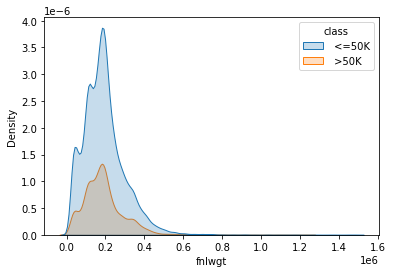

In [26]:
sns.kdeplot(df_persons['fnlwgt'],color='green',fill=True,hue=df_persons['class'])

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

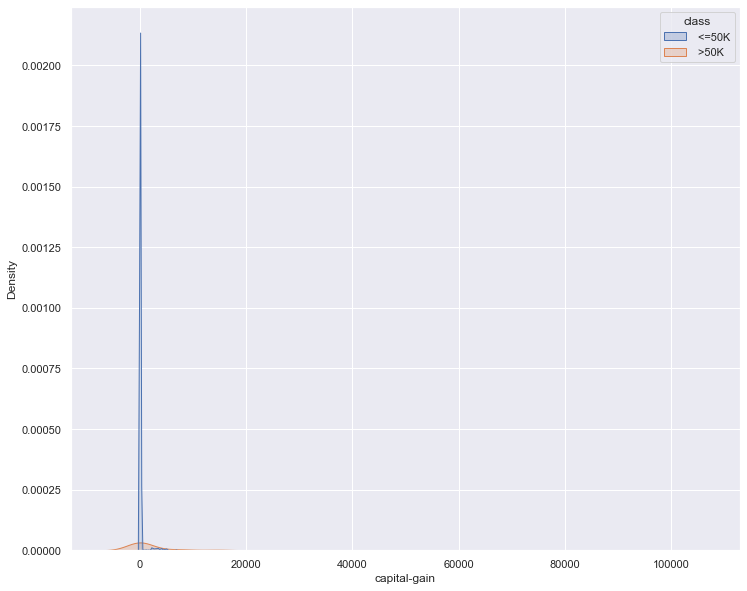

In [27]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.kdeplot(df_persons['capital-gain'],color='red',fill=True,hue=df_persons['class'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

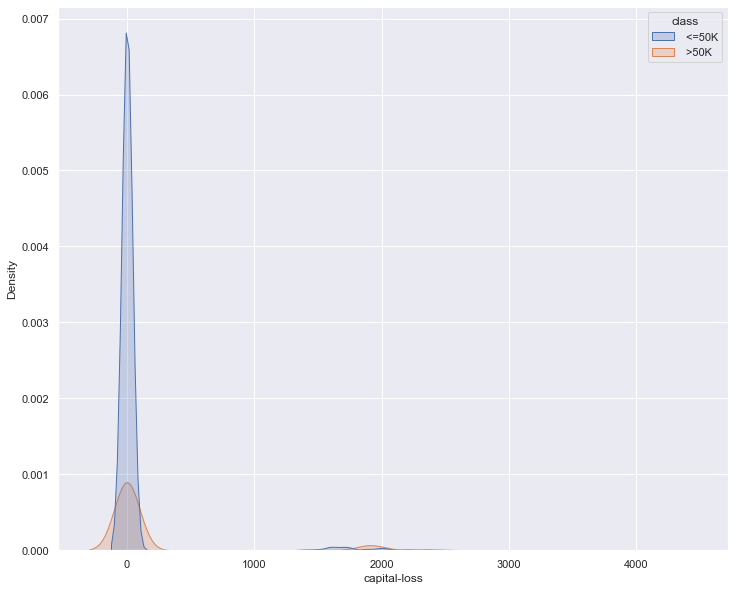

In [28]:
sns.kdeplot(df_persons['capital-loss'],color='green',fill=True,hue=df_persons['class'])

## Pre-processing 

In [29]:
X = df_persons.drop('class',axis=1)

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
y = df_persons['class']

In [32]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [33]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [34]:
X.drop('education',axis=1,inplace=True)

In [35]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [36]:
X['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder

In [38]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop='first',dtype='int32'),['workclass','marital-status','occupation','relationship','race','sex','native-country']),
    ('tnf2',StandardScaler(),['age','hours-per-week'])    
], remainder='passthrough')

In [39]:
X = transformer.fit_transform(X)


In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,df_persons['class'],test_size=.2)

In [41]:
X_test.shape

(6145, 84)

In [52]:
X_train.shape

(24580, 84)

In [43]:
y_train.value_counts()

 <=50K    18426
 >50K      6154
Name: class, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [45]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
model.score(X_train,y_train)

0.9999593165174939

[Text(0.46153846153846156, 0.9166666666666666, 'X[8] <= 0.5\ngini = 0.375\nsamples = 24580\nvalue = [18426, 6154]'),
 Text(0.23076923076923078, 0.75, 'X[82] <= 7073.5\ngini = 0.129\nsamples = 13079\nvalue = [12170, 909]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[81] <= 12.5\ngini = 0.099\nsamples = 12833\nvalue = [12162, 671]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[83] <= 2391.5\ngini = 0.052\nsamples = 10184\nvalue = [9911, 273]'),
 Text(0.038461538461538464, 0.25, 'X[79] <= -0.037\ngini = 0.05\nsamples = 10165\nvalue = [9906, 259]'),
 Text(0.019230769230769232, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.057692307692307696, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11538461538461539, 0.25, 'X[83] <= 2656.5\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.09615384615384616, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1346153846153846, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.4166666666666667, 'X[79] <= 0.213\ngini = 0

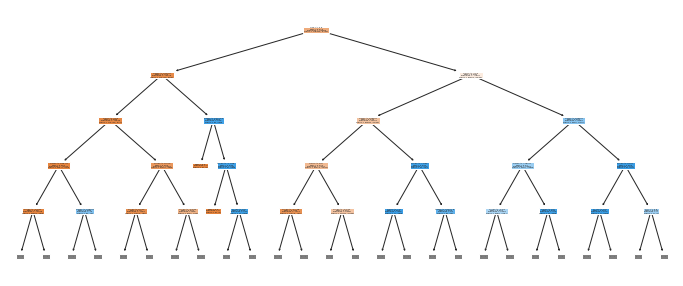

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,5))
tree.plot_tree(model,max_depth=4,filled=True)

In [48]:
fig.savefig('DT_classification-persons.png')

In [49]:
X_train.shape

(24580, 84)

In [50]:
X_test.shape

(6145, 84)

In [51]:
y_predict = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_predict,y_test)

0.8174125305126119

In [55]:
grid_param = {
    'criterion' :['gini','entropy'] ,
    'max_depth':range(2,32),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [58]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
#hyper-parameter tuning
grid_search.best_params_